Aqui vamos trabalhar em uma base de dados de powerlifters e analisar os dados entre si

## Entendimento dos dados

*  Abaixo encontra-se uma tabela com as informações do Dataset que serão utilizadas. A seguir será tratado os dados e irá conter somente essas informações

### Dicionário de dados



| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| Sex              | Sexo do Atleta           |object|
| Equipment        |  Equipamento Utilizado    | object|
| Age              |  Idade do Atleta         |int|
| BodyweightKg     | Peso Corporal            | float |
| WeightClassKg    | Categoria de Peso         | float |
| Best3SquatKg     | Melhor levantamento no Squat na melhor de 3 | float |
| Best3BenchKg     | Melhor levantamento no Bench na melhor de 3 | float |
| Best3DeadliftKg  | Melhor levantamento no Deadlift na melhor de 3 | float |
| TotalKg          | Soma total de levantamento | float |
| Wilks            | Coeficiente de Wilks       | float |

# Importando Bibliotecas

In [69]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import os

#import statsmodels.formula.api as smf
#import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import tree
#from sklearn import metrics
#from scipy.stats import ks_2samp
#from scipy.stats import t

# Carregando o dataset
df_ = pd.read_csv('openpowerlifting.csv')

# Apresentar o dataframe
df_.head()

<ipython-input-69-be7c64bfa70e>:21: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ = pd.read_csv('openpowerlifting.csv')


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


# Preparação dos Dados

In [70]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

In [71]:
# Retirando colunas desnecessárias
df_ = df_.drop(['Name', 'Event', 'AgeClass', 'Division', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg',
               'Bench1Kg','Bench2Kg','Bench3Kg','Bench4Kg', 'Deadlift1Kg',
               'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Place',
               'McCulloch', 'Glossbrenner', 'IPFPoints', 'Country',
               'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName'], axis=1)

In [72]:
# Contagem de valores nulos

df_.isna().sum()

,0
Sex,0
Equipment,0
Age,665827
BodyweightKg,16732
WeightClassKg,13312
Best3SquatKg,391904
Best3BenchKg,147173
Best3DeadliftKg,341546
TotalKg,110170
Wilks,118947


In [73]:
# Retirando valores nulos, inclusive do Tested, pra mantermos atletas NATURAIS, testados quimicamente.

df_ = df_.dropna()
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331068 entries, 8164 to 1423351
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sex              331068 non-null  object 
 1   Equipment        331068 non-null  object 
 2   Age              331068 non-null  float64
 3   BodyweightKg     331068 non-null  float64
 4   WeightClassKg    331068 non-null  object 
 5   Best3SquatKg     331068 non-null  float64
 6   Best3BenchKg     331068 non-null  float64
 7   Best3DeadliftKg  331068 non-null  float64
 8   TotalKg          331068 non-null  float64
 9   Wilks            331068 non-null  float64
 10  Tested           331068 non-null  object 
dtypes: float64(7), object(4)
memory usage: 30.3+ MB


In [74]:
# Durante a construção do projeto foi visto que possuem idades menores que 18 anos

df_['Age'].unique()

array([16. , 20.5, 18. , 17.5, 25. , 37.5, 31.5, 26.5, 39. , 24. , 33.5,
       40.5, 17. , 37. , 25.5, 16.5, 71. , 23.5, 22. , 21.5, 18.5, 28.5,
       20. , 32. , 30.5, 55. , 23. , 48. , 38. , 26. , 24.5, 30. , 29. ,
       27. , 27.5, 19. , 33. , 22.5, 31. , 29.5, 21. , 28. , 19.5, 42.5,
       41. , 34.5, 36. , 35. , 52.5, 47. , 46. , 57.5, 53.5, 61. , 62. ,
       63.5, 47.5, 51.5, 49.5, 58.5, 54. , 59.5, 14.5, 15.5, 38.5, 36.5,
       56. , 45.5, 15. , 64. , 42. , 64.5, 53. , 44. , 44.5, 50.5, 57. ,
       59. , 66. , 50. , 39.5, 79. , 52. , 46.5, 43. , 60. , 49. , 70. ,
       72. , 41.5, 34. , 69.5, 45. , 14. , 40. , 35.5, 32.5, 54.5, 51. ,
       65. , 65.5, 48.5, 55.5, 62.5, 68.5, 56.5, 78. , 58. , 63. , 43.5,
       61.5, 80. , 76. , 77.5, 74.5, 81.5, 75. , 60.5, 81. , 78.5, 70.5,
       67. , 66.5, 68. , 73. , 75.5, 74. , 69. , 76.5, 13.5, 77. , 73.5,
       79.5, 72.5, 67.5, 11.5, 12.5, 13. , 12. , 10.5,  4.5, 11. , 10. ,
        8.5, 71.5, 87.5, 88.5,  9. ,  0.5,  7.5,  1

In [75]:
# Para interesse próprio, irei utilizar pessoas maiores de 18 anos
df_= df_[df_['Age'] >= 18.0]

In [76]:
# Também foi identificado pesos corporais significamente baixos
df_['BodyweightKg'].min()

24.95

In [77]:
# Selecionando apenas pesos maiores de 50kg (adultos)
df_ = df_[df_['BodyweightKg'] >= 50.0]

In [78]:
# Valores únicos das categorias de peso
df_['WeightClassKg'].unique()

array(['74', '120+', '120', '63', '83', '93', '52', '57', '72', '66',
       '84', '84+', '105', '59', '56', '60', '67.5', '75', '82.5', '90',
       '100', '110', '125', '125+', '53', '90+', '100+', '75+', '82.5+',
       '145', '145+', '60+', '93+', '67.5+', '105+', '63+', '140', '140+',
       '155', '50.5', '80', '58.5', '70', '54.4', '78.9', '63.5', '83.9',
       '102', '113.4', '127', '55.5', '82', '85', '77.1', '92.9', '67',
       '73', '82.3', '122.5', '113.5', '57.5', '77', '58', '64', '94',
       '62', '69', '74.8', '89.8', '124.7+', '109.7', '55.7', '99.7',
       '124.7', '59.8', '67.1', '51.7', '82.1', '110+', '72+', '60.1',
       '51.9', '117.7', '67.3', '117.7+'], dtype=object)

In [79]:
# Tratando valores das categorias de peso
df_ = df_[df_['WeightClassKg'] != '+']
df_['WeightClassKg'] = df_['WeightClassKg'].astype(str)
df_['WeightClassKg'] = df_['WeightClassKg'].str.rstrip('+' ).astype(float)

In [80]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267575 entries, 8165 to 1423351
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Sex              267575 non-null  object 
 1   Equipment        267575 non-null  object 
 2   Age              267575 non-null  float64
 3   BodyweightKg     267575 non-null  float64
 4   WeightClassKg    267575 non-null  float64
 5   Best3SquatKg     267575 non-null  float64
 6   Best3BenchKg     267575 non-null  float64
 7   Best3DeadliftKg  267575 non-null  float64
 8   TotalKg          267575 non-null  float64
 9   Wilks            267575 non-null  float64
 10  Tested           267575 non-null  object 
dtypes: float64(8), object(3)
memory usage: 24.5+ MB


# Análise dos Dados

In [81]:
df_.nunique()

,0
Sex,2
Equipment,4
Age,148
BodyweightKg,8516
WeightClassKg,67
Best3SquatKg,956
Best3BenchKg,805
Best3DeadliftKg,888
TotalKg,2581
Wilks,39241


<ipython-input-82-b61d4b0ab8f6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='TotalKg', data=weight_by_sex, palette='Blues_d')


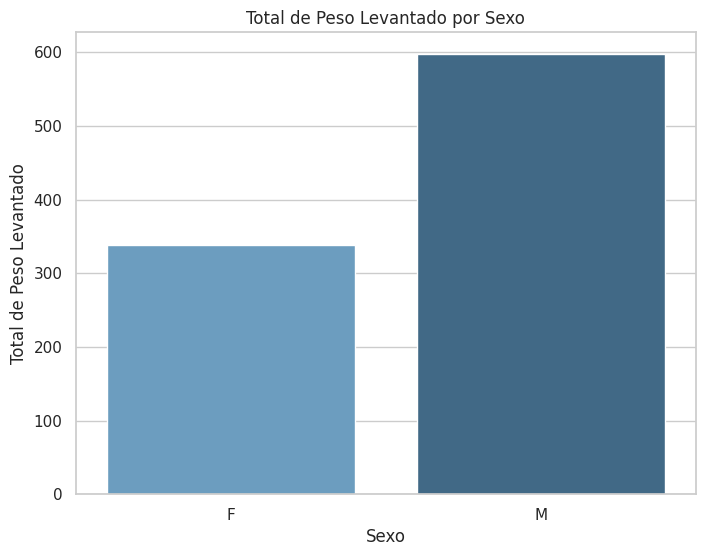

In [82]:
# Agrupar por sexo e somar o total de peso levantado para cada grupo
weight_by_sex = df_.groupby('Sex')['TotalKg'].mean().reset_index()

# Configurar estilo do seaborn
sns.set(style="whitegrid")

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='TotalKg', data=weight_by_sex, palette='Blues_d')

# Adicionar títulos e rótulos
plt.title('Total de Peso Levantado por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Total de Peso Levantado')

# Mostrar o gráfico
plt.show()

Levantamento total médio de homens é quase o dobro das mulheres.

In [83]:
#df_M = df_[df_['Sex'] == 'M']
#df_F = df_[df_['Sex'] == 'F']

## Observar o levantamento total médio em relação a idade e sexo

<ipython-input-84-8e3d37e9a17e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_idade_sexo = df_.groupby(['Age_bin', 'Sex'])['TotalKg'].mean().reset_index()


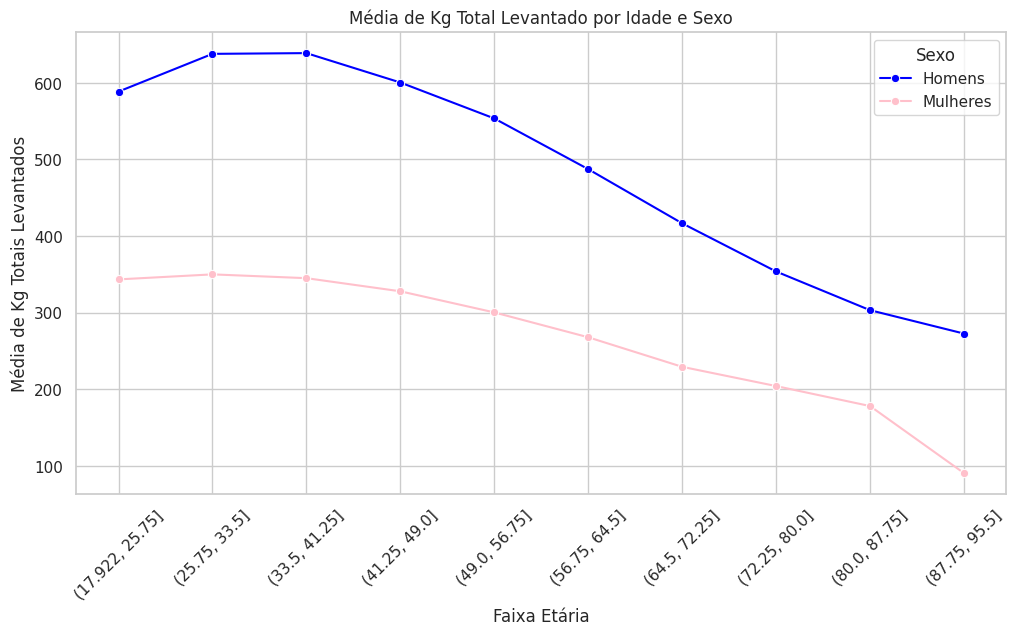

In [84]:
# Dividir a variável 'idade' em 10 intervalos
df_['Age_bin'] = pd.cut(df_['Age'], bins=10)

# Criar a figura e os eixos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Calcular a média de TotalKg para cada faixa etária e sexo
media_idade_sexo = df_.groupby(['Age_bin', 'Sex'])['TotalKg'].mean().reset_index()

# Converter a 'Age_bin' para string
media_idade_sexo['Age_bin'] = media_idade_sexo['Age_bin'].astype(str)

# Plotar separadamente para homens e mulheres
sns.lineplot(
    data=media_idade_sexo[media_idade_sexo['Sex'] == 'M'],
    x='Age_bin',
    y='TotalKg',
    marker='o',
    color='blue',
    label='Homens'
)

sns.lineplot(
    data=media_idade_sexo[media_idade_sexo['Sex'] == 'F'],
    x='Age_bin',
    y='TotalKg',
    marker='o',
    color='pink',
    label='Mulheres'
)

# Customizações
plt.xticks(rotation=45)
plt.xlabel('Faixa Etária')
plt.ylabel('Média de Kg Totais Levantados')
plt.title('Média de Kg Total Levantado por Idade e Sexo')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

Podemos ver que nos homens, a idade entre 25 e 41 anos é onde se observa maiores capacidades de geração de força. O levantamento total deles somando as 3 provas tem a maior média em relação as outras idades. Nas mulheres é quase igual, porém entre 25 e 33 a tem maior média

## Observar o levantamento total médio em relação as Categorias de peso e Sexo

<ipython-input-85-a4f89597e181>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_peso_cat = df_.groupby(['WeightClassKg_bin', 'Sex'])['TotalKg'].mean().reset_index()


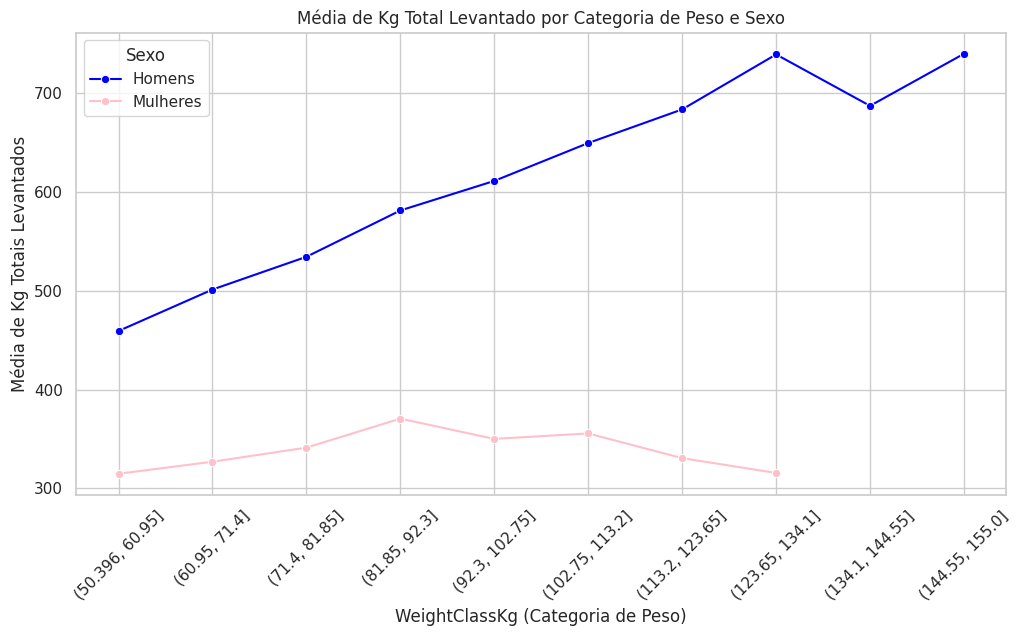

In [85]:
# Dividir a variável 'WeightClassKg' em 10 intervalos
df_['WeightClassKg_bin'] = pd.cut(df_['WeightClassKg'], bins=10)

# Criar a figura e os eixos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Calcular a média de TotalKg para cada WeightClassKg e sexo
media_peso_cat = df_.groupby(['WeightClassKg_bin', 'Sex'])['TotalKg'].mean().reset_index()

# Converter a 'WeightClassKg_bin' para string
media_peso_cat['WeightClassKg_bin'] = media_peso_cat['WeightClassKg_bin'].astype(str)

# Plotar separadamente para homens e mulheres
sns.lineplot(
    data=media_peso_cat[media_peso_cat['Sex'] == 'M'],
    x='WeightClassKg_bin',
    y='TotalKg',
    marker='o',
    color='blue',
    label='Homens'
)

sns.lineplot(
    data=media_peso_cat[media_peso_cat['Sex'] == 'F'],
    x='WeightClassKg_bin',
    y='TotalKg',
    marker='o',
    color='pink',
    label='Mulheres'
)

# Customizações
plt.xticks(rotation=45)
plt.xlabel('WeightClassKg (Categoria de Peso)')
plt.ylabel('Média de Kg Totais Levantados')
plt.title('Média de Kg Total Levantado por Categoria de Peso e Sexo')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

Vemos que nos homens, os que tem maior média de levantamento por categoria de peso é na faixa de 123 e 134 kg, e 144 a 155kg .

Nas mulheres observa-se que na categoria de 81 a 92kg possuem maior média de levantamento total de peso

## Observar o levantamento total médio em relação as Peso Corporal e Sexo

<ipython-input-86-75a13998a0e5>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_peso_corp = df_.groupby(['BodyweightKg_bin', 'Sex'])['TotalKg'].mean().reset_index()


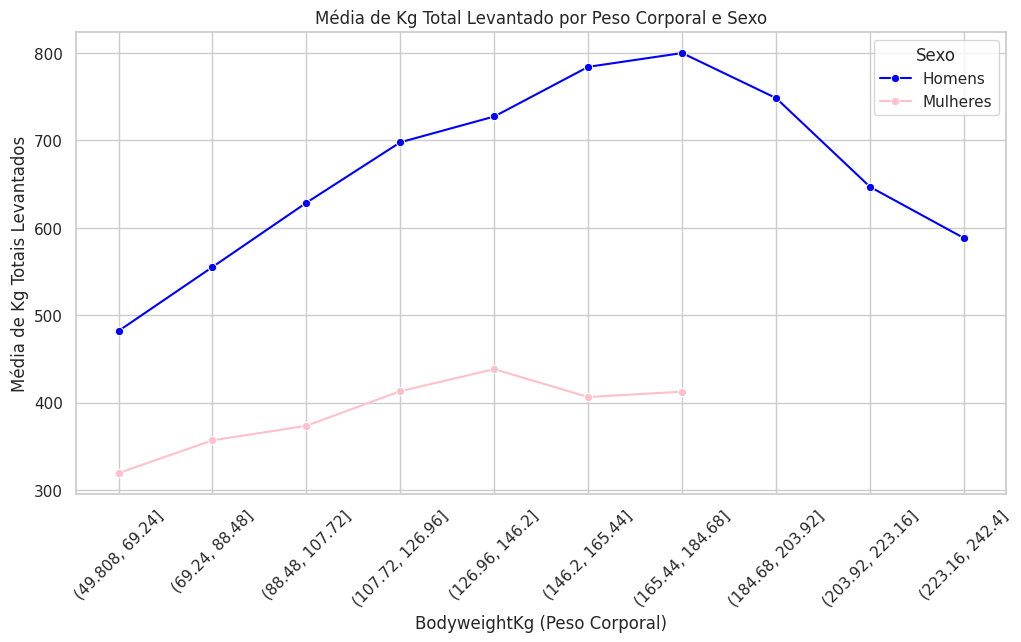

In [86]:
# Dividir a variável 'BodyweightKg' em 10 intervalos
df_['BodyweightKg_bin'] = pd.cut(df_['BodyweightKg'], bins=10)

# Criar a figura e os eixos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Calcular a média de TotalKg para cada faixa etária e sexo
media_peso_corp = df_.groupby(['BodyweightKg_bin', 'Sex'])['TotalKg'].mean().reset_index()

# Converter a 'Age_bin' para string
media_peso_corp['BodyweightKg_bin'] = media_peso_corp['BodyweightKg_bin'].astype(str)

# Plotar separadamente para homens e mulheres
sns.lineplot(
    data=media_peso_corp[media_peso_corp['Sex'] == 'M'],
    x='BodyweightKg_bin',
    y='TotalKg',
    marker='o',
    color='blue',
    label='Homens'
)

sns.lineplot(
    data=media_peso_corp[media_peso_corp['Sex'] == 'F'],
    x='BodyweightKg_bin',
    y='TotalKg',
    marker='o',
    color='pink',
    label='Mulheres'
)

# Customizações
plt.xticks(rotation=45)
plt.xlabel('BodyweightKg (Peso Corporal)')
plt.ylabel('Média de Kg Totais Levantados')
plt.title('Média de Kg Total Levantado por Peso Corporal e Sexo')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

Nos homens, a maior média de peso levantado é na faixa de 165 a 184kg corporal. Até essa faixa existe uma linha crescente de média, e depois volta a cair pra homens mais pesados.

Nas mulheres acontece o crescimento da média até chegar nos 126 a 146kg corporal, depois disso desce um pouco a média e se estabiliza

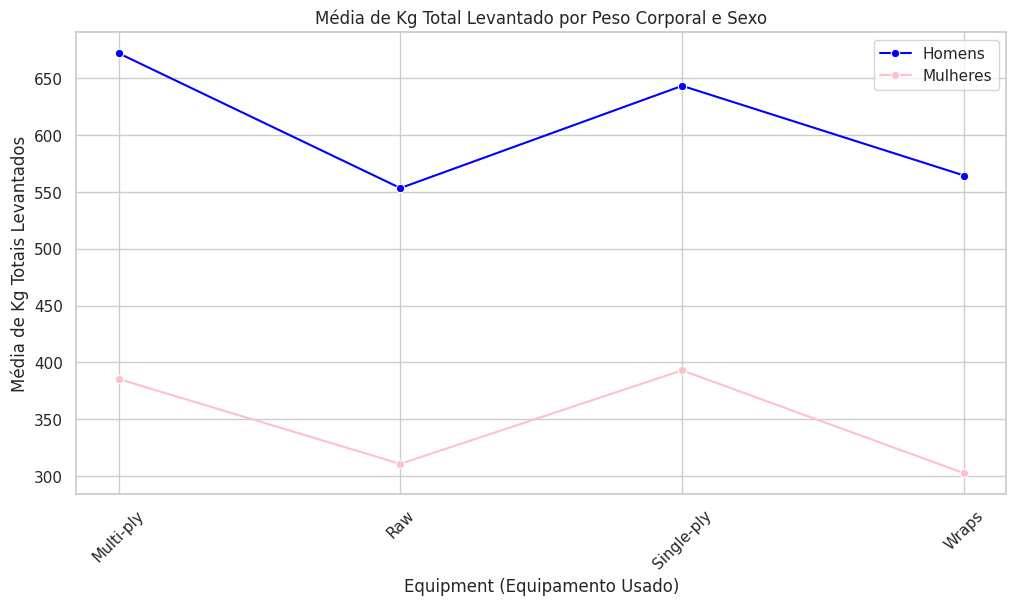

In [87]:
# Criar a figura e os eixos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Calcular a média de TotalKg para cada faixa etária e sexo
tipo_equipamento = df_.groupby(['Equipment', 'Sex'])['TotalKg'].mean().reset_index()

# Converter a 'Age_bin' para string
tipo_equipamento['Equipment'] = tipo_equipamento['Equipment'].astype(str)

# Plotar separadamente para homens e mulheres
sns.lineplot(
    data=tipo_equipamento[tipo_equipamento['Sex'] == 'M'],
    x='Equipment',
    y='TotalKg',
    marker='o',
    color='blue',
    label='Homens'
)

sns.lineplot(
    data=tipo_equipamento[tipo_equipamento['Sex'] == 'F'],
    x='Equipment',
    y='TotalKg',
    marker='o',
    color='pink',
    label='Mulheres'
)

# Customizações
plt.xticks(rotation=45)
plt.xlabel('Equipment (Equipamento Usado)')
plt.ylabel('Média de Kg Totais Levantados')
plt.title('Média de Kg Total Levantado por Peso Corporal e Sexo')
plt.grid(True)
plt.show()

<ipython-input-88-6eab725e210e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Wilks_bin = df_.groupby(['Wilks_bin', 'Sex'])['TotalKg'].mean().reset_index()


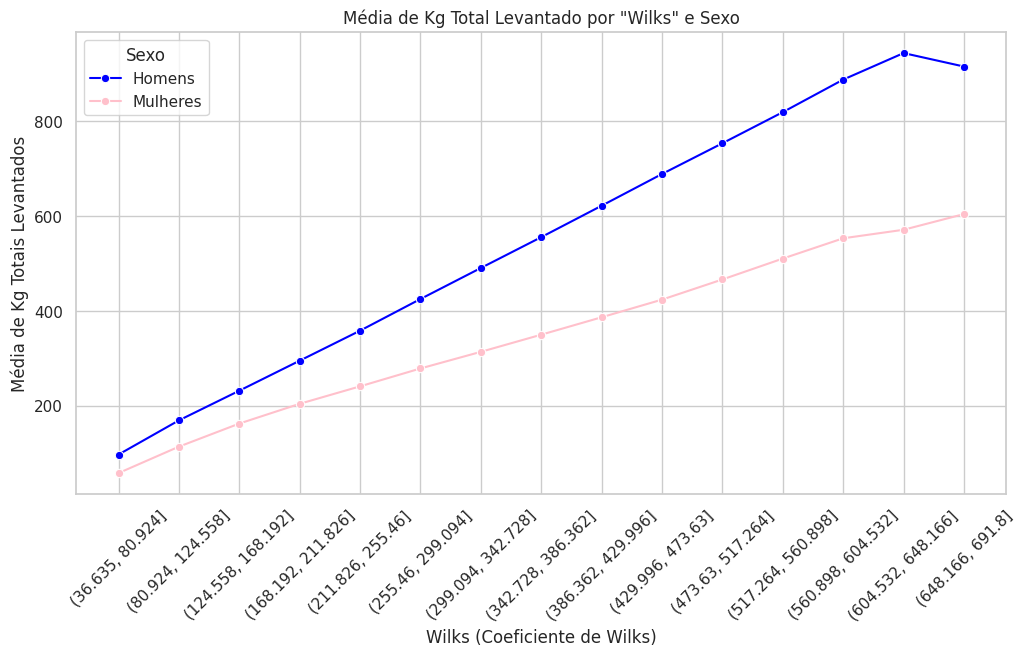

In [88]:
# Dividir a variável 'Wilks' em 15 intervalos
df_['Wilks_bin'] = pd.cut(df_['Wilks'], bins=15)

# Criar a figura e os eixos
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

# Calcular a média de TotalKg para cada faixa etária e sexo
Wilks_bin = df_.groupby(['Wilks_bin', 'Sex'])['TotalKg'].mean().reset_index()

# Converter a 'Age_bin' para string
Wilks_bin['Wilks_bin'] = Wilks_bin['Wilks_bin'].astype(str)

# Plotar separadamente para homens e mulheres
sns.lineplot(
    data=Wilks_bin[Wilks_bin['Sex'] == 'M'],
    x='Wilks_bin',
    y='TotalKg',
    marker='o',
    color='blue',
    label='Homens'
)

sns.lineplot(
    data=Wilks_bin[Wilks_bin['Sex'] == 'F'],
    x='Wilks_bin',
    y='TotalKg',
    marker='o',
    color='pink',
    label='Mulheres'
)

# Customizações
plt.xticks(rotation=45)
plt.xlabel('Wilks (Coeficiente de Wilks)')
plt.ylabel('Média de Kg Totais Levantados')
plt.title('Média de Kg Total Levantado por "Wilks" e Sexo')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

O Coeficiente de Wilks ou Fórmula de Wilks é utilizado para calcular a força de um atleta de levantamento de peso básico (powerlifter) contra outros levantadores, apesar dos diferentes pesos corporais entre os competidores.

Aqui podemos observar como o coeficiente Wilks ele se torna LINEAR. O crescente valor dele é diretamente proporcional a média de Kg totais levantados.

In [89]:
df_dummies = pd.get_dummies(df_, columns=['Sex', 'Equipment'])
df_dummies.drop(columns=['Age_bin', 'WeightClassKg_bin', 'BodyweightKg_bin', 'Wilks_bin', 'Tested'], inplace=True)
df_dummies.head()

,Age,BodyweightKg,WeightClassKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Wilks,Sex_F,Sex_M,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Wraps
8165,20.5,69.5,74.0,130.0,90.0,145.0,365.0,275.04,False,True,False,True,False,False
8166,18.0,69.4,74.0,155.0,100.0,175.0,430.0,324.38,False,True,False,True,False,False
8169,25.0,125.3,120.0,255.0,172.5,275.0,702.5,400.12,False,True,False,True,False,False
8170,37.5,106.7,120.0,180.0,150.0,220.0,550.0,326.85,False,True,False,True,False,False
8171,31.5,73.9,74.0,185.0,142.5,230.0,557.5,401.40,False,True,False,True,False,False


# Preparando os dados para aplicar um modelo de machine learning

In [90]:
# Separamos em features e target
X = df_dummies.drop(columns='Wilks')
y = df_dummies['Wilks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Vendo as dimensões
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (200681, 13)
Tamanho do conjunto de teste: (66894, 13)


### Treinando o modelo

In [91]:
# Instanciando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Verificando os coeficientes do modelo
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")

Coeficientes: [ -0.08848813  -0.77150921  -1.62729747  21.99961562  21.95521871
  21.99743349 -21.30905112  40.62039691 -40.62039691   0.94345474
  -3.63131465   4.95405373  -2.26619383]
Intercepto: 248.32740387144


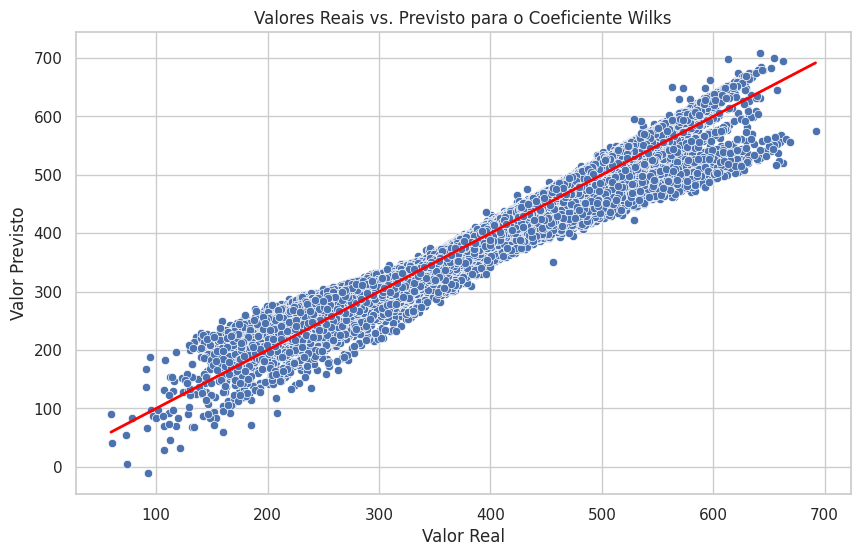

In [92]:
# Criando um DataFrame com os valores reais e previstos
resultados = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Previsto': y_pred
})

# Plotando o gráfico de valores reais vs. previstos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor Real', y='Valor Previsto', data=resultados)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Valores Reais vs. Previsto para o Coeficiente Wilks')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.show()